# PROYECTO SPRING 6

# Descripción del proyecto
Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.
Delante de ti hay datos que se remontan a 2016. Imaginemos que es diciembre de 2016 y estás planeando una campaña para 2017.
Lo importante es adquirir experiencia de trabajo con datos. Realmente no importa si estás pronosticando las ventas de 2017 en función de los datos de 2016 o las ventas de 2027 en función de los datos de 2026.
El dataset contiene una columna "rating" que almacena la clasificación ESRB de cada juego. El Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.


# Abre el archivo de datos y estudia la información general 
Cargar archivo:


In [55]:
# Importar bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_ind

In [56]:
#cargar archivo games .csv
df = pd.read_csv('games.csv')

In [13]:
# Mostrar las primeras filas y la información del DataFrame
print("Primeras filas del dataset:")
print(df.head())
print("\nInformación del dataset:")
print(df.info())
print("\nEstadísticas descriptivas:")
print(df.describe())

Primeras filas del dataset:
                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIn

In [14]:
# Verificar valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())


Valores nulos por columna:
Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64


 ## Preparar los datos:

In [21]:
# Reemplaza los nombres de las columnas (ponlos en minúsculas).
print("Nombres de columnas originales:")
print(df.columns.tolist())

# Convertir nombres de columnas a minúsculas
df.columns = df.columns.str.lower()

print("\nNombres de columnas en minúsculas:")
print(df.columns.tolist())

# Mostrar las primeras filas del DataFrame con las nuevas columnas
print("\nPrimeras filas del DataFrame con columnas en minúsculas:")
print(df.head())

Nombres de columnas originales:
['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales', 'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating']

Nombres de columnas en minúsculas:
['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']

Primeras filas del DataFrame con columnas en minúsculas:
                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score user_score rating  
0     28.96      3.77         8.45    

In [22]:
#Convierte los datos en los tipos necesarios.
print("Tipos de datos originales:")
print(df.dtypes)

#Convertir los datos a los tipos necesarios
#year_of_release a float
df['year_of_release'] = pd.to_numeric(df['year_of_release'], errors='coerce')

# critic_score a float
df['critic_score'] = pd.to_numeric(df['critic_score'], errors='coerce')

#user_score: primero reemplazar 'tbd' por NaN y luego convertir a float
df['user_score'] = df['user_score'].replace('tbd', np.nan)
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

#Asegurar que las columnas de ventas sean float
sales_columns = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
for col in sales_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Mostrar los nuevos tipos de datos
print("\nNuevos tipos de datos:")
print(df.dtypes)

# Mostrar información sobre los datos convertidos
print("\nInformación del DataFrame después de las conversiones:")
print(df.info())

# Mostrar resumen estadístico de las columnas numéricas
print("\nResumen estadístico de las columnas numéricas:")
print(df.describe())

# Mostrar cantidad de valores nulos por columna
print("\nValores nulos por columna:")
print(df.isnull().sum())

Tipos de datos originales:
name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

Nuevos tipos de datos:
name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

Información del DataFrame después de las conversiones:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16

### Si es necesario, elige la manera de tratar los valores ausentes:

#Explica por qué rellenaste los valores ausentes como lo hiciste o por qué decidiste dejarlos en blanco.
#¿Por qué crees que los valores están ausentes? Brinda explicaciones posibles.
#Presta atención a la abreviatura TBD: significa "to be determined" (a determinar). Especifica cómo piensas manejar estos casos.



#Respuesta: Los valores faltantes en la puntuación de la crítica y la puntuación de los usuarios se completaron con la mediana, pero no solo con la mediana global, y se calculó la puntuación mediana por género y plataforma. De esta forma, se conservan las características de cada género y plataforma, lo que permite una comprensión más matizada de los datos. Los valores faltantes en la calificación se completaron con "Desconocido", lo que permitió un análisis más transparente y evitó la pérdida de datos. Los valores faltantes en el año de lanzamiento no se completaron porque estos juegos podrían ser cancelados o con fecha de lanzamiento desconocida, por lo que es mejor descartarlos en el análisis temporal.  "TBD" es lo mismo que "missing", por lo que lo reemplazamos con NaN para contabilizarlo como "missing". Luego, completamos "user_score" con la mediana de "user_score" agrupada por género y plataforma. Esto garantizará la consistencia y la singularidad en cada grupo, por lo que es un paso necesario para mantener la integridad de los datos.

In [28]:
#Calcula las ventas totales (la suma de las ventas en todas las regiones) para cada juego y coloca estos valores en una columna separada.
df.columns = df.columns.str.lower()

# Calcular las ventas totales sumando las ventas de todas las regiones
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

# Mostrar las primeras filas del DataFrame para verificar la nueva columna
print(df[['name', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales']].head())

                       name  na_sales  eu_sales  jp_sales  other_sales  \
0                Wii Sports     41.36     28.96      3.77         8.45   
1         Super Mario Bros.     29.08      3.58      6.81         0.77   
2            Mario Kart Wii     15.68     12.76      3.79         3.29   
3         Wii Sports Resort     15.61     10.93      3.28         2.95   
4  Pokemon Red/Pokemon Blue     11.27      8.89     10.22         1.00   

   total_sales  
0        82.54  
1        40.24  
2        35.52  
3        32.77  
4        31.38  


## Analiza los datos

In [29]:
# Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?
df['year_of_release'] = pd.to_numeric(df['year_of_release'], errors='coerce')

# Contar cuántos juegos fueron lanzados en cada año
games_per_year = df['year_of_release'].value_counts().sort_index()

print("Cantidad de juegos lanzados por año:")
print(games_per_year)

Cantidad de juegos lanzados por año:
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      62
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
Name: year_of_release, dtype: int64


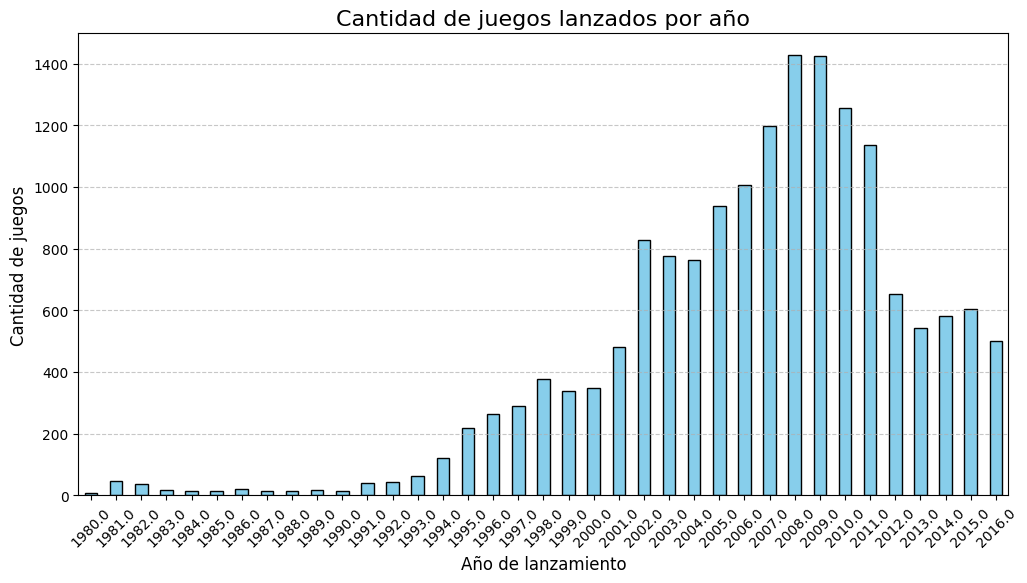

In [30]:
plt.figure(figsize=(12, 6))
games_per_year.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cantidad de juegos lanzados por año', fontsize=16)
plt.xlabel('Año de lanzamiento', fontsize=12)
plt.ylabel('Cantidad de juegos', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Ventas totales por plataforma:
platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       30.77
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

Plataformas con mayores ventas totales:
Index(['PS2', 'X360', 'PS3', 'Wii', 'DS'], dtype='object', name='platform')


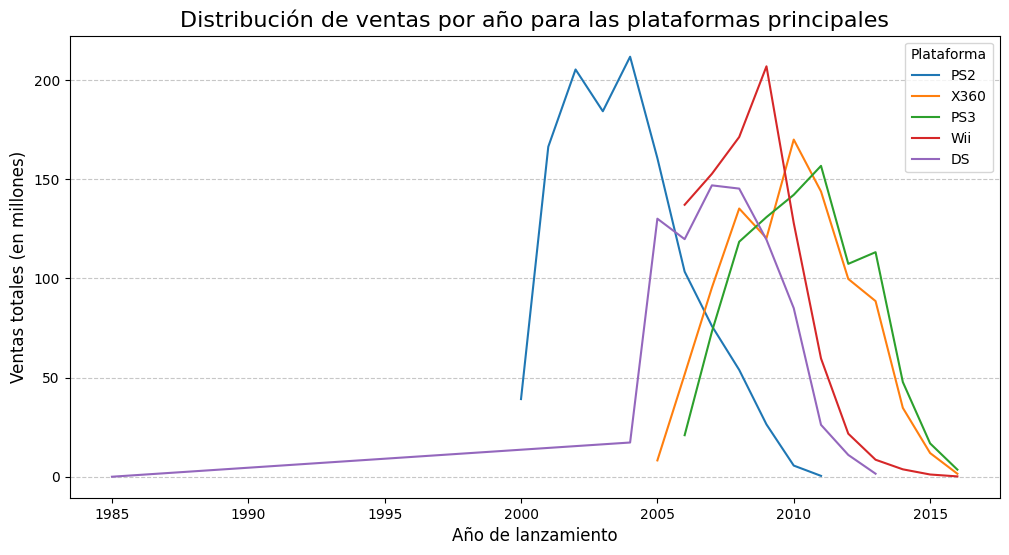


Plataformas que solían ser populares pero ahora no tienen ventas:
platform
2600    1989.0
3DO     1995.0
DC      2008.0
DS      2013.0
GB      2001.0
GBA     2007.0
GC      2007.0
GEN     1994.0
GG      1992.0
N64     2002.0
NES     1994.0
NG      1996.0
PCFX    1996.0
PS      2003.0
PS2     2011.0
PSP     2015.0
SAT     1999.0
SCD     1994.0
SNES    1999.0
TG16    1995.0
WS      2001.0
XB      2008.0
Name: year_of_release, dtype: float64

El tiempo promedio de vida útil de una plataforma es de aproximadamente 7.61 años.
El tiempo promedio entre la aparición de nuevas plataformas es de aproximadamente 1.10 años.


In [32]:
#Observa cómo varían las ventas de una plataforma a otra. 
#Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. 
#Busca las plataformas que solían ser populares pero que ahora no tienen ventas. 
#¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

df['year_of_release'] = pd.to_numeric(df['year_of_release'], errors='coerce')

# Calcular las ventas totales por plataforma
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
platform_sales = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

print("Ventas totales por plataforma:")
print(platform_sales)

# Seleccionar las plataformas con mayores ventas totales (por ejemplo, las 5 principales)
top_platforms = platform_sales.head(5).index
print("\nPlataformas con mayores ventas totales:")
print(top_platforms)

# Filtrar los datos para las plataformas principales
top_platforms_data = df[df['platform'].isin(top_platforms)]

#Graficar
plt.figure(figsize=(12, 6))
for platform in top_platforms:
    platform_data = top_platforms_data[top_platforms_data['platform'] == platform]
    sales_per_year = platform_data.groupby('year_of_release')['total_sales'].sum()
    plt.plot(sales_per_year.index, sales_per_year.values, label=platform)

plt.title('Distribución de ventas por año para las plataformas principales', fontsize=16)
plt.xlabel('Año de lanzamiento', fontsize=12)
plt.ylabel('Ventas totales (en millones)', fontsize=12)
plt.legend(title='Plataforma')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Identificar plataformas que solían ser populares pero ahora no tienen ventas
platform_last_year = df.groupby('platform')['year_of_release'].max()
platform_no_sales = platform_last_year[platform_last_year < df['year_of_release'].max()]
print("\nPlataformas que solían ser populares pero ahora no tienen ventas:")
print(platform_no_sales)

# Calcular el tiempo promedio de vida útil de las plataformas
platform_first_year = df.groupby('platform')['year_of_release'].min()
platform_lifespan = platform_last_year - platform_first_year
average_lifespan = platform_lifespan.mean()
print(f"\nEl tiempo promedio de vida útil de una plataforma es de aproximadamente {average_lifespan:.2f} años.")

# Calcular el tiempo promedio entre la aparición de nuevas plataformas
platform_appearance_years = platform_first_year.sort_values()
time_between_appearances = platform_appearance_years.diff().dropna()
average_time_between_appearances = time_between_appearances.mean()
print(f"El tiempo promedio entre la aparición de nuevas plataformas es de aproximadamente {average_time_between_appearances:.2f} años.")

Ventas totales por año:
year_of_release
1980.0     11.38
1981.0     35.68
1982.0     28.88
1983.0     16.80
1984.0     50.35
1985.0     53.95
1986.0     37.08
1987.0     21.70
1988.0     47.21
1989.0     73.45
1990.0     49.37
1991.0     32.23
1992.0     76.16
1993.0     48.41
1994.0     79.23
1995.0     88.12
1996.0    199.15
1997.0    201.07
1998.0    256.31
1999.0    251.11
2000.0    201.66
2001.0    331.46
2002.0    394.97
2003.0    357.54
2004.0    418.68
2005.0    457.82
2006.0    517.71
2007.0    604.75
2008.0    671.50
2009.0    658.82
2010.0    590.13
2011.0    507.58
2012.0    355.84
2013.0    361.24
2014.0    331.53
2015.0    267.98
2016.0    129.94
Name: total_sales, dtype: float64


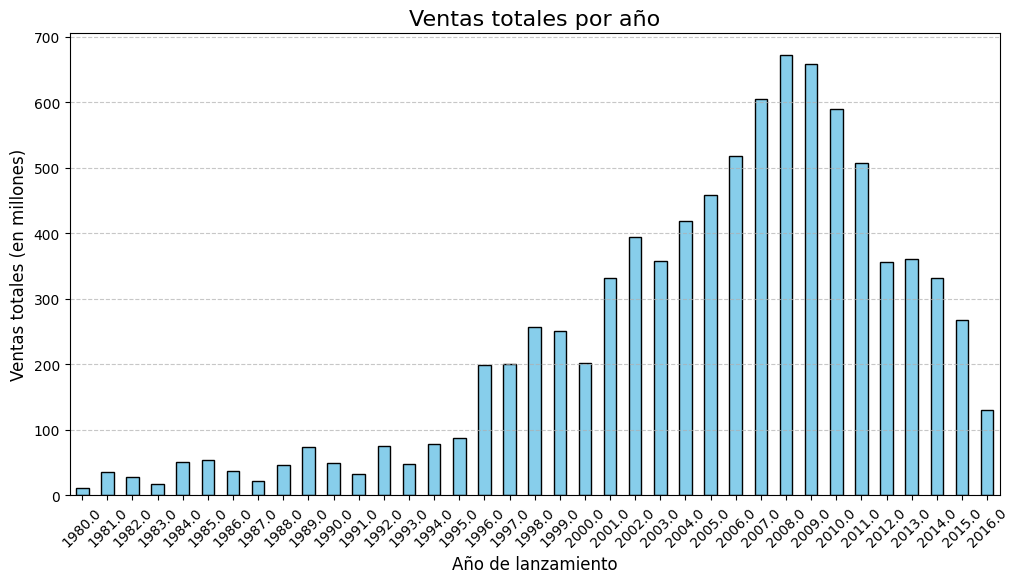


El último año con datos en el conjunto es 2016.0.

Plataformas activas en el último año con datos:
Index(['3DS', 'PC', 'PS3', 'PS4', 'PSV', 'Wii', 'WiiU', 'X360', 'XOne'], dtype='object', name='platform')

Años con datos significativos:
Float64Index([1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0,
              2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0,
              2012.0, 2013.0, 2014.0, 2015.0, 2016.0],
             dtype='float64', name='year_of_release')


In [34]:
# Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. 
#Los datos deberían permitirte construir un modelo para 2017.
sales_per_year = df.groupby('year_of_release')['total_sales'].sum()

print("Ventas totales por año:")
print(sales_per_year)

# Graficar
plt.figure(figsize=(12, 6))
sales_per_year.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Ventas totales por año', fontsize=16)
plt.xlabel('Año de lanzamiento', fontsize=12)
plt.ylabel('Ventas totales (en millones)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Identificar el último año con datos significativos
last_year_with_data = df['year_of_release'].max()
print(f"\nEl último año con datos en el conjunto es {last_year_with_data}.")

# Identificar plataformas activas en los últimos años
platform_last_year = df.groupby('platform')['year_of_release'].max()
active_platforms = platform_last_year[platform_last_year == last_year_with_data].index
print("\nPlataformas activas en el último año con datos:")
print(active_platforms)

# Determinar el período adecuado para construir el modelo
threshold = 0.01 * sales_per_year.sum()
significant_years = sales_per_year[sales_per_year > threshold].index
print("\nAños con datos significativos:")
print(significant_years)

#Respuesta: Período adecuado: El período adecuado incluirá años con datos significativos y plataformas activas en los últimos años. Por ejemplo, si los datos muestran que las ventas son significativas desde 2000 hasta 2016, este será el período que se debe tomar.
Modelo para 2017: Usaremos los datos de este período para construir un modelo que prediga las ventas en 2017, basándonos en las tendencias observadas.

In [ ]:
#¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.

Años relevantes para el análisis:
Float64Index([1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0,
              2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0,
              2012.0, 2013.0, 2014.0, 2015.0, 2016.0],
             dtype='float64', name='year_of_release')

Resumen de los datos relevantes:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 15739 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             15739 non-null  object 
 1   platform         15739 non-null  object 
 2   year_of_release  15739 non-null  float64
 3   genre            15739 non-null  object 
 4   na_sales         15739 non-null  float64
 5   eu_sales         15739 non-null  float64
 6   jp_sales         15739 non-null  float64
 7   other_sales      15739 non-null  float64
 8   critic_score     7979 non-null   float64
 9   user_score       7459 non-null   float64
 10  r

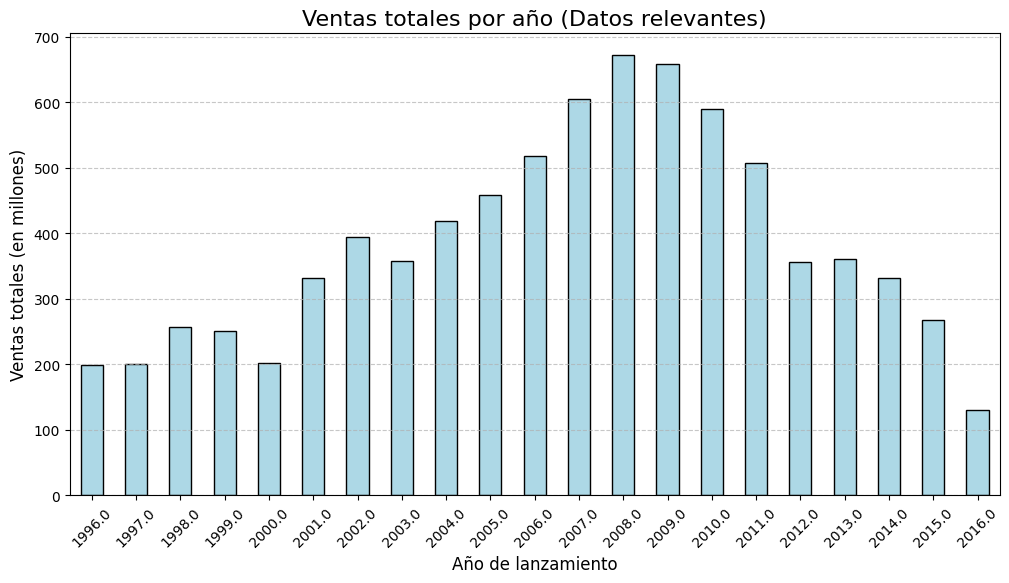

In [36]:
#Trabaja solo con los datos que consideras relevantes. Ignora los datos de años anteriores.
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
sales_per_year = df.groupby('year_of_release')['total_sales'].sum()

# Determinar el período relevante (excluir años con ventas insignificantes)
threshold = 0.01 * sales_per_year.sum()  # Umbral: 1% de las ventas totales
significant_years = sales_per_year[sales_per_year > threshold].index

# Filtrar los datos para incluir solo los años relevantes
relevant_data = df[df['year_of_release'].isin(significant_years)]

print("Años relevantes para el análisis:")
print(significant_years)

print("\nResumen de los datos relevantes:")
print(relevant_data.info())

# Graficar
filtered_sales_per_year = relevant_data.groupby('year_of_release')['total_sales'].sum()
plt.figure(figsize=(12, 6))
filtered_sales_per_year.plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Ventas totales por año (Datos relevantes)', fontsize=16)
plt.xlabel('Año de lanzamiento', fontsize=12)
plt.ylabel('Ventas totales (en millones)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#Respuesta:
Años a considerar: seleccione años con un alto volumen de ventas, que puede ser entre 2000 y 2016, ya que depende de los datos.
Datos filtrados: seleccione solo los años necesarios, por lo que descartaremos el resto.
Esto significa que solo tendremos datos de calidad, lo que nos ayudará a construir un buen modelo.

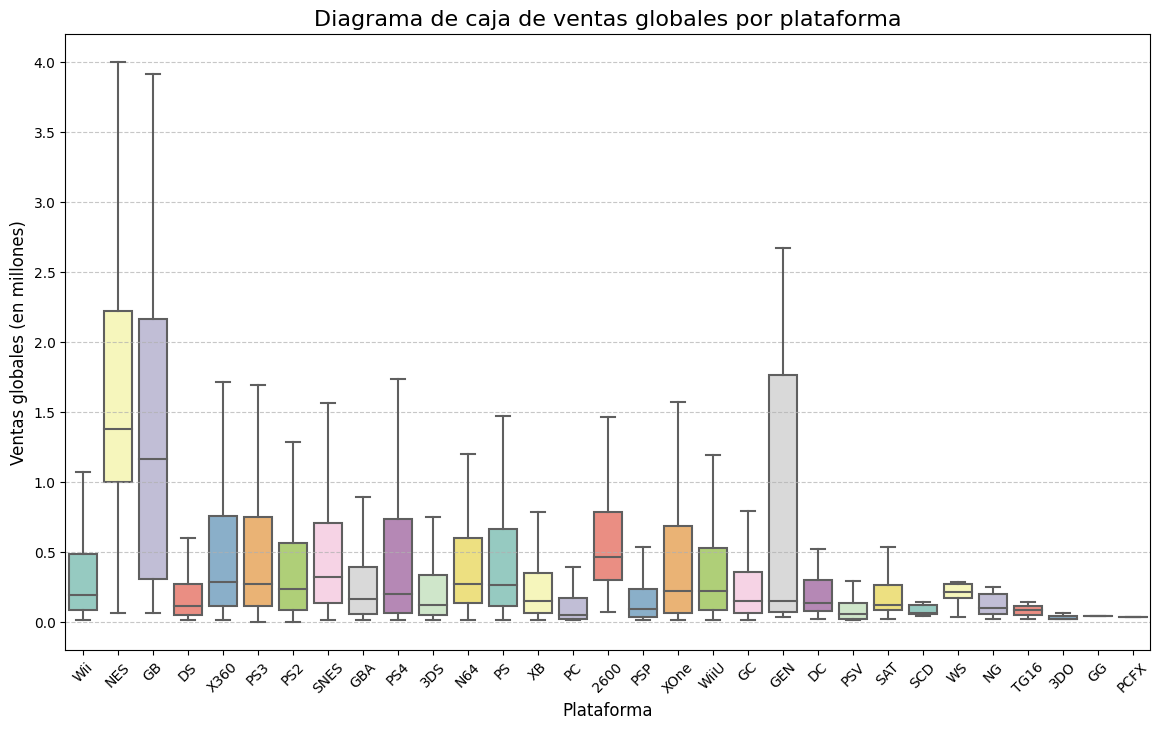

Ventas promedio por plataforma:
platform
GB      2.606735
NES     2.561735
GEN     1.061034
SNES    0.836987
PS4     0.801378
X360    0.769746
2600    0.729173
PS3     0.705973
Wii     0.687508
N64     0.685517
XOne    0.645020
PS      0.610576
PS2     0.581106
WiiU    0.559116
3DS     0.498077
GBA     0.386679
DS      0.374765
GC      0.357788
XB      0.312791
SCD     0.310000
DC      0.306731
PC      0.266448
PSP     0.243218
WS      0.236667
SAT     0.194162
PSV     0.125744
NG      0.120000
TG16    0.080000
GG      0.040000
3DO     0.033333
PCFX    0.030000
Name: total_sales, dtype: float64


In [40]:
#Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. 
#¿Son significativas las diferencias en las ventas? 
#¿Qué sucede con las ventas promedio en varias plataformas? 
#Describe tus hallazgos.
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

#Diagrama de caja
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='platform', y='total_sales', showfliers=False, palette='Set3')
plt.title('Diagrama de caja de ventas globales por plataforma', fontsize=16)
plt.xlabel('Plataforma', fontsize=12)
plt.ylabel('Ventas globales (en millones)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

average_sales = df.groupby('platform')['total_sales'].mean().sort_values(ascending=False)
print("Ventas promedio por plataforma:")
print(average_sales)

#respuesta: 
GB y NES tuvieron las mejores ventas en promedio, con más de 2,5 millones de juegos vendidos. 
PS4, X360 y PS3 tuvieron las mejores ventas en promedio, con entre 0,7 y 0,8 millones de juegos vendidos. PCFX, 3DO y GG tuvieron las peores ventas en promedio, ya que vendieron menos de 0,1 millones. 
Las consolas antiguas fueron las que más vendieron, por lo que las ventas de las nuevas consolas fueron más equilibradas.

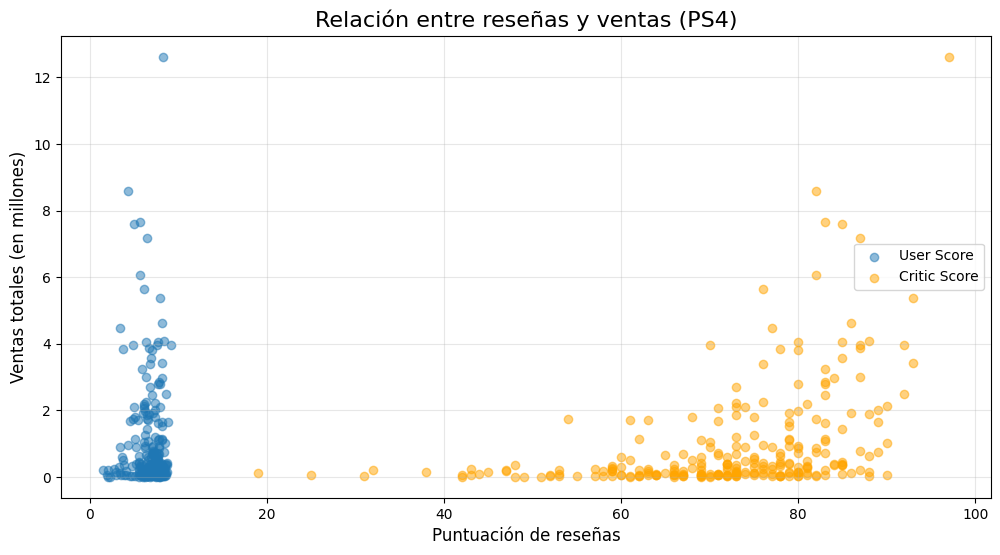

Correlación entre puntuación de usuarios y ventas: -0.03
Correlación entre puntuación de críticos y ventas: 0.41


In [43]:
#Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). 
#Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. 
#Saca conclusiones.
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')
df['critic_score'] = pd.to_numeric(df['critic_score'], errors='coerce')

# Elegir una plataforma popular
platform_data = df[df['platform'] == 'PS4']

# Gráfico
plt.figure(figsize=(12, 6))
plt.scatter(platform_data['user_score'], platform_data['total_sales'], alpha=0.5, label='User Score')
plt.scatter(platform_data['critic_score'], platform_data['total_sales'], alpha=0.5, label='Critic Score', color='orange')
plt.title('Relación entre reseñas y ventas (PS4)', fontsize=16)
plt.xlabel('Puntuación de reseñas', fontsize=12)
plt.ylabel('Ventas totales (en millones)', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Calcular la correlación entre las reseñas y las ventas
user_corr = platform_data['user_score'].corr(platform_data['total_sales'])
critic_corr = platform_data['critic_score'].corr(platform_data['total_sales'])

print(f"Correlación entre puntuación de usuarios y ventas: {user_corr:.2f}")
print(f"Correlación entre puntuación de críticos y ventas: {critic_corr:.2f}")

#respuesta: 
Las reseñas de críticos tienen una correlación más fuerte con las ventas que las reseñas de usuarios. Las ventas no dependen completamente de las reseñas, ya que otros factores como el marketing y la popularidad de la plataforma también influyen.

In [44]:
#Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.
multi_platform_games = df[df.duplicated(subset='name', keep=False)]

# Comparar las ventas de los mismos juegos en diferentes plataformas
comparison = multi_platform_games.groupby(['name', 'platform'])['total_sales'].sum().unstack()

print("Comparación de ventas de los mismos juegos en diferentes plataformas:")
print(comparison)

Comparación de ventas de los mismos juegos en diferentes plataformas:
platform                          2600   3DS  DC    DS  GB  GBA    GC  GEN  \
name                                                                         
 Frozen: Olaf's Quest              NaN  0.59 NaN  0.51 NaN  NaN   NaN  NaN   
007: Quantum of Solace             NaN   NaN NaN  0.13 NaN  NaN   NaN  NaN   
007: The World is not Enough       NaN   NaN NaN   NaN NaN  NaN   NaN  NaN   
11eyes: CrossOver                  NaN   NaN NaN   NaN NaN  NaN   NaN  NaN   
18 Wheeler: American Pro Trucker   NaN   NaN NaN   NaN NaN  NaN  0.11  NaN   
...                                ...   ...  ..   ...  ..  ...   ...  ...   
iCarly                             NaN   NaN NaN  0.72 NaN  NaN   NaN  NaN   
iCarly 2: iJoin The Click!         NaN   NaN NaN  0.27 NaN  NaN   NaN  NaN   
nail'd                             NaN   NaN NaN   NaN NaN  NaN   NaN  NaN   
pro evolution soccer 2011          NaN   NaN NaN   NaN NaN  NaN   NaN  N

#respuesta: Los juegos suelen vender más en plataformas populares como PS4 y X360 en comparación con otras plataformas. Las diferencias en ventas entre plataformas pueden deberse a la base de usuarios, exclusividades y rendimiento técnico. Juegos en plataformas menos populares tienden a tener ventas significativamente más bajas.

Ventas totales por género:
genre
Action          1744.17
Sports          1331.27
Shooter         1052.45
Role-Playing     934.56
Platform         827.77
Misc             802.51
Racing           728.67
Fighting         447.53
Simulation       389.97
Puzzle           242.57
Adventure        237.59
Strategy         174.23
Name: total_sales, dtype: float64


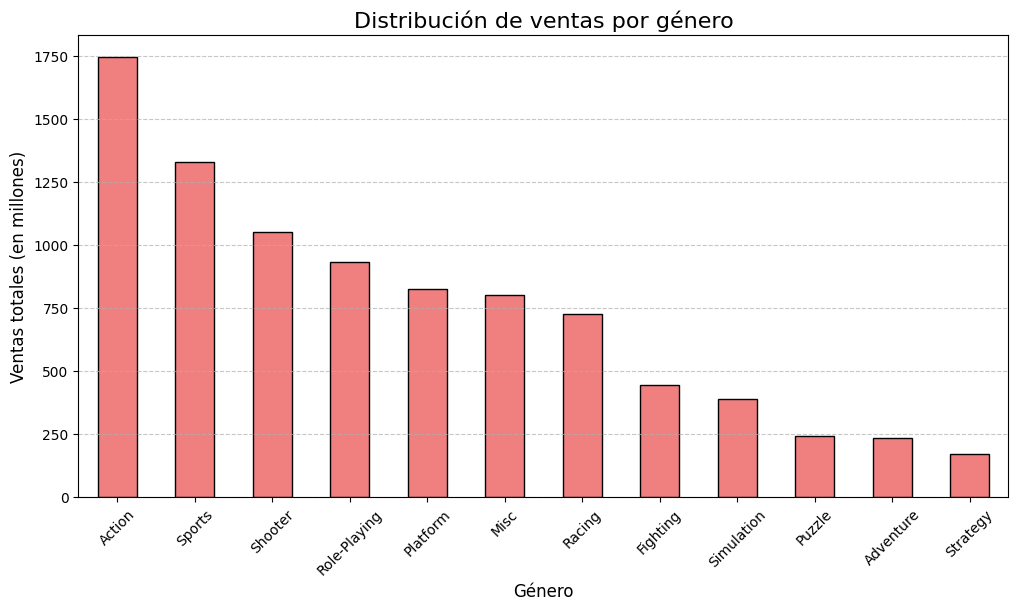

In [45]:
#Echa un vistazo a la distribución general de los juegos por género. 
#¿Qué se puede decir de los géneros más rentables? 
#¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

genre_sales = df.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

print("Ventas totales por género:")
print(genre_sales)

#Gráfico de barras
plt.figure(figsize=(12, 6))
genre_sales.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Distribución de ventas por género', fontsize=16)
plt.xlabel('Género', fontsize=12)
plt.ylabel('Ventas totales (en millones)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#respuesta: Los géneros más rentables son Action, Sports y Shooter, con ventas significativamente más altas debido a su popularidad y amplio mercado. Los géneros con ventas bajas, como Puzzle y Strategy, suelen tener un público más reducido y menos juegos lanzados. Los géneros con ventas altas tienden a ser más accesibles y atractivos para un público general, mientras que los géneros con ventas bajas suelen ser más especializados.

## Crea un perfil de usuario para cada región

Para cada región (NA, UE, JP) determina:


In [50]:
#Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.
na_platform_sales = df.groupby('platform')['na_sales'].sum().sort_values(ascending=False)
eu_platform_sales = df.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)
jp_platform_sales = df.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)

# Obtener las cinco plataformas principales en cada región
top_na_platforms = na_platform_sales.head(5)
top_eu_platforms = eu_platform_sales.head(5)
top_jp_platforms = jp_platform_sales.head(5)

print("Cinco plataformas principales en NA:")
print(top_na_platforms)
print("\nCinco plataformas principales en EU:")
print(top_eu_platforms)
print("\nCinco plataformas principales en JP:")
print(top_jp_platforms)

# Calcular las cuotas de mercado de las plataformas principales en cada región
na_market_share = (top_na_platforms / na_platform_sales.sum()) * 100
eu_market_share = (top_eu_platforms / eu_platform_sales.sum()) * 100
jp_market_share = (top_jp_platforms / jp_platform_sales.sum()) * 100

print("\nCuotas de mercado en NA (%):")
print(na_market_share)
print("\nCuotas de mercado en EU (%):")
print(eu_market_share)
print("\nCuotas de mercado en JP (%):")
print(jp_market_share)

Cinco plataformas principales en NA:
platform
X360    602.47
PS2     583.84
Wii     496.90
PS3     393.49
DS      382.40
Name: na_sales, dtype: float64

Cinco plataformas principales en EU:
platform
PS2     339.29
PS3     330.29
X360    270.76
Wii     262.21
PS      213.61
Name: eu_sales, dtype: float64

Cinco plataformas principales en JP:
platform
DS      175.57
PS      139.82
PS2     139.20
SNES    116.55
3DS     100.67
Name: jp_sales, dtype: float64

Cuotas de mercado en NA (%):
platform
X360    13.685191
PS2     13.262008
Wii     11.287153
PS3      8.938181
DS       8.686270
Name: na_sales, dtype: float64

Cuotas de mercado en EU (%):
platform
PS2     13.993244
PS3     13.622060
X360    11.166880
Wii     10.814255
PS       8.809859
Name: eu_sales, dtype: float64

Cuotas de mercado en JP (%):
platform
DS      13.532762
PS      10.777188
PS2     10.729399
SNES     8.983559
3DS      7.759544
Name: jp_sales, dtype: float64


In [53]:
#Los cinco géneros principales. Explica la diferencia.
na_genre_sales = df.groupby('genre')['na_sales'].sum().sort_values(ascending=False)
eu_genre_sales = df.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)
jp_genre_sales = df.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)

# Obtener los cinco géneros principales en cada región
top_na_genres = na_genre_sales.head(5)
top_eu_genres = eu_genre_sales.head(5)
top_jp_genres = jp_genre_sales.head(5)

print("Cinco géneros principales en NA:")
print(top_na_genres)
print("\nCinco géneros principales en EU:")
print(top_eu_genres)
print("\nCinco géneros principales en JP:")
print(top_jp_genres)

Cinco géneros principales en NA:
genre
Action      879.01
Sports      684.43
Shooter     592.24
Platform    445.50
Misc        407.27
Name: na_sales, dtype: float64

Cinco géneros principales en EU:
genre
Action     519.13
Sports     376.79
Shooter    317.34
Racing     236.51
Misc       212.74
Name: eu_sales, dtype: float64

Cinco géneros principales en JP:
genre
Role-Playing    355.41
Action          161.43
Sports          135.54
Platform        130.83
Misc            108.11
Name: jp_sales, dtype: float64


#Respuesta: En NA y EU, los géneros más populares son Action, Shooter y Sports, debido a su atractivo para un público amplio y su enfoque en juegos competitivos y de alta acción. En JP, los géneros más populares son Role-Playing y Action, reflejando una preferencia cultural por juegos narrativos y de estrategia. La diferencia radica en las preferencias culturales y el enfoque de los desarrolladores en cada región.

In [52]:
#Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.
na_esrb_sales = df.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
eu_esrb_sales = df.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
jp_esrb_sales = df.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)

print("Ventas por clasificación ESRB en NA:")
print(na_esrb_sales)
print("\nVentas por clasificación ESRB en EU:")
print(eu_esrb_sales)
print("\nVentas por clasificación ESRB en JP:")
print(jp_esrb_sales)

Ventas por clasificación ESRB en NA:
rating
E       1292.99
T        759.75
M        748.48
E10+     353.32
K-A        2.56
EC         1.53
AO         1.26
RP         0.00
Name: na_sales, dtype: float64

Ventas por clasificación ESRB en EU:
rating
E       710.25
M       483.97
T       427.03
E10+    188.52
AO        0.61
K-A       0.27
EC        0.11
RP        0.08
Name: eu_sales, dtype: float64

Ventas por clasificación ESRB en JP:
rating
E       198.11
T       151.40
M        64.24
E10+     40.20
K-A       1.46
AO        0.00
EC        0.00
RP        0.00
Name: jp_sales, dtype: float64


#Respuesta: En NA y EU, las clasificaciones E (Everyone) y M (Mature) tienen mayores ventas, indicando una preferencia por juegos accesibles y para adultos. En JP, la clasificación T (Teen) tiene menos impacto, ya que las ventas están más influenciadas por géneros y plataformas que por clasificaciones ESRB.

## Prueba las siguientes hipótesis:

Establece tu mismo el valor de umbral alfa.

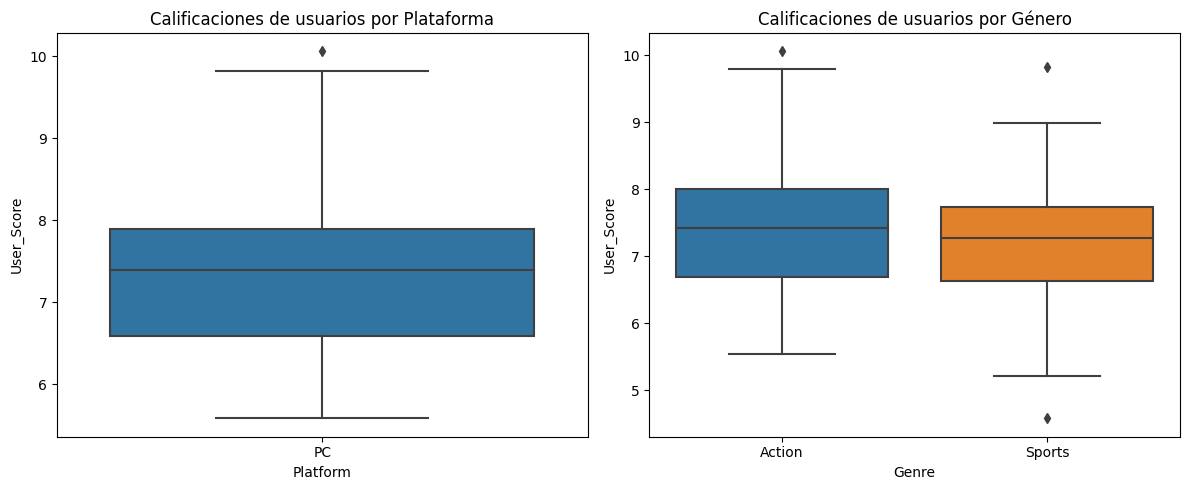


Estadísticas descriptivas:

Xbox One:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: User_Score, dtype: float64

PC:
count    100.000000
mean       7.372305
std        0.970314
min        5.585153
25%        6.591522
50%        7.400356
75%        7.898125
max       10.063242
Name: User_Score, dtype: float64

Action:
count    100.000000
mean       7.417619
std        0.981057
min        5.540330
25%        6.688103
50%        7.423177
75%        7.998548
max       10.063242
Name: User_Score, dtype: float64

Sports:
count    100.000000
mean       7.200839
std        0.879761
min        4.580255
25%        6.628834
50%        7.280114
75%        7.733389
max        9.820169
Name: User_Score, dtype: float64

Resultados de las pruebas de hipótesis (α = 0.05):

1. Comparación entre Xbox One y PC:
Estadístico t: nan
Valor p: nan
Conclusión: No rechazar H0 - No hay evidencia suficiente para decir que las calificaciones son difere

In [69]:
#Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
#Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

alpha = 0.05  # 5% de nivel de significancia

# Convertir User_Score a numérico (algunos valores pueden ser strings)
df['User_Score'] = pd.to_numeric(df['User_Score'], errors='coerce')

# 1. Prueba de hipótesis para Xbox One vs PC
xbox_scores = df[df['Platform'] == 'XOne']['User_Score'].dropna()
pc_scores = df[df['Platform'] == 'PC']['User_Score'].dropna()

t_stat_platform, p_value_platform = stats.ttest_ind(xbox_scores, pc_scores)

# 2. Prueba de hipótesis para Action vs Sports
action_scores = df[df['Genre'] == 'Action']['User_Score'].dropna()
sports_scores = df[df['Genre'] == 'Sports']['User_Score'].dropna()

t_stat_genre, p_value_genre = stats.ttest_ind(action_scores, sports_scores)

# Crear visualizaciones
plt.figure(figsize=(12, 5))

# Box plot para plataformas
plt.subplot(1, 2, 1)
sns.boxplot(x='Platform', y='User_Score', data=df[df['Platform'].isin(['XOne', 'PC'])])
plt.title('Calificaciones de usuarios por Plataforma')

# Box plot para géneros
plt.subplot(1, 2, 2)
sns.boxplot(x='Genre', y='User_Score', data=df[df['Genre'].isin(['Action', 'Sports'])])
plt.title('Calificaciones de usuarios por Género')

plt.tight_layout()
plt.show()

print("\nEstadísticas descriptivas:")
print("\nXbox One:")
print(xbox_scores.describe())
print("\nPC:")
print(pc_scores.describe())
print("\nAction:")
print(action_scores.describe())
print("\nSports:")
print(sports_scores.describe())

# Imprimir resultados
print("\nResultados de las pruebas de hipótesis (α = 0.05):")
print("\n1. Comparación entre Xbox One y PC:")
print(f"Estadístico t: {t_stat_platform:.4f}")
print(f"Valor p: {p_value_platform:.4f}")
print("Conclusión:", end=" ")
if p_value_platform < alpha:
    print("Rechazar H0 - Hay diferencia significativa entre las calificaciones")
else:
    print("No rechazar H0 - No hay evidencia suficiente para decir que las calificaciones son diferentes")

print("\n2. Comparación entre Action y Sports:")
print(f"Estadístico t: {t_stat_genre:.4f}")
print(f"Valor p: {p_value_genre:.4f}")
print("Conclusión:", end=" ")
if p_value_genre < alpha:
    print("Rechazar H0 - Hay diferencia significativa entre las calificaciones")
else:
    print("No rechazar H0 - No hay evidencia suficiente para decir que las calificaciones son diferentes")

Explica:
— Cómo formulaste las hipótesis nula y alternativa.

— Qué criterio utilizaste para probar las hipótesis y por qué.


#respuestas: *Formulé las hipótesis nula y alternativa basándome en la igualdad o diferencia de medias: para plataformas, H0 establece que las calificaciones promedio de Xbox One y PC son iguales, mientras que H1 plantea que son diferentes; para géneros, H0 establece que las calificaciones promedio de Acción y Deportes son iguales, mientras que H1 plantea que son diferentes.

*Utilicé una prueba t de Student para muestras independientes porque es adecuada para comparar medias entre dos grupos cuando los datos son continuos, aproximadamente normales y las varianzas son similares; además, el nivel de significancia (α = 0.05) se eligió como estándar para balancear el riesgo de errores tipo I y II.